# Description

This Python script analyzes a dataset traffic situation in Nairobi. The dataset contains information about ride details such as ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, and max_capacity. The script encompasses various aspects of data exploration, visualization, predictive modeling, key performance indicators (KPIs), and analytics to derive insights. The script is designed to provide actionable insights for optimizing operations, enhancing customer experience, and guiding future decision-making in addressing traffic congestion problem in the city.


In [8]:
# To start working with the dataset, we will import the following libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## Loading the date into our environment

In [5]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from tkinter import Tk, filedialog
import pandas as pd

def select_file(b):
    clear_output()
    root = Tk()
    root.withdraw()  # Hide the main window
    root.call('wm', 'attributes', '.', '-topmost', True)  # Raise the root to the top of all windows
    b.files = filedialog.askopenfilename(multiple=False)  # List of selected files
    path = b.files
    global df
    df = pd.read_csv(path)  # Changed from pd.read_excel to pd.read_csv
    print(f'Loaded dataframe from {path}')

fileselect = widgets.Button(description="File select")
fileselect.on_click(select_file)

display(fileselect)
 
display(df.head())

Button(description='File select', style=ButtonStyle())

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


## Understanding the Data

In [6]:
df.dtypes

ride_id             int64
seat_number        object
payment_method     object
payment_receipt    object
travel_date        object
travel_time        object
travel_from        object
travel_to          object
car_type           object
max_capacity        int64
dtype: object

In [7]:
df.shape

(51645, 10)

            ride_id  max_capacity
count  51645.000000  51645.000000
mean   10188.645793     34.534321
std     2211.295708     18.451193
min     1442.000000     11.000000
25%     8287.000000     11.000000
50%    10353.000000     49.000000
75%    12029.000000     49.000000
max    20117.000000     49.000000


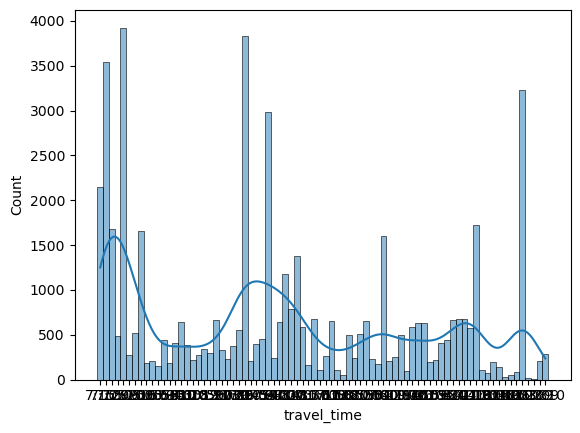

In [9]:
# Display summary statistics
print(df.describe())

# Visualize data distribution
sns.histplot(df['travel_time'], bins=20, kde=True)
plt.show()

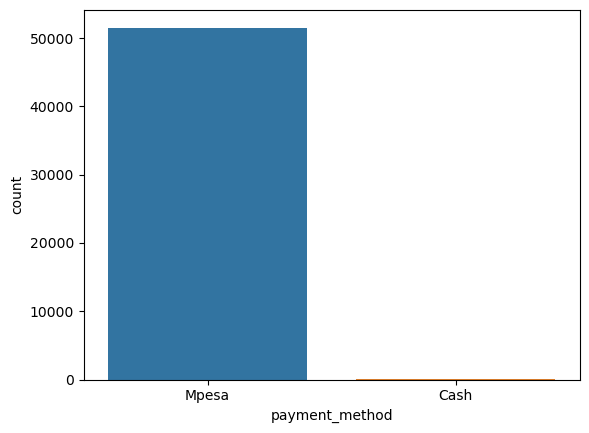

In [10]:
# Plot payment method distribution
sns.countplot(x='payment_method', data=df)
plt.show()

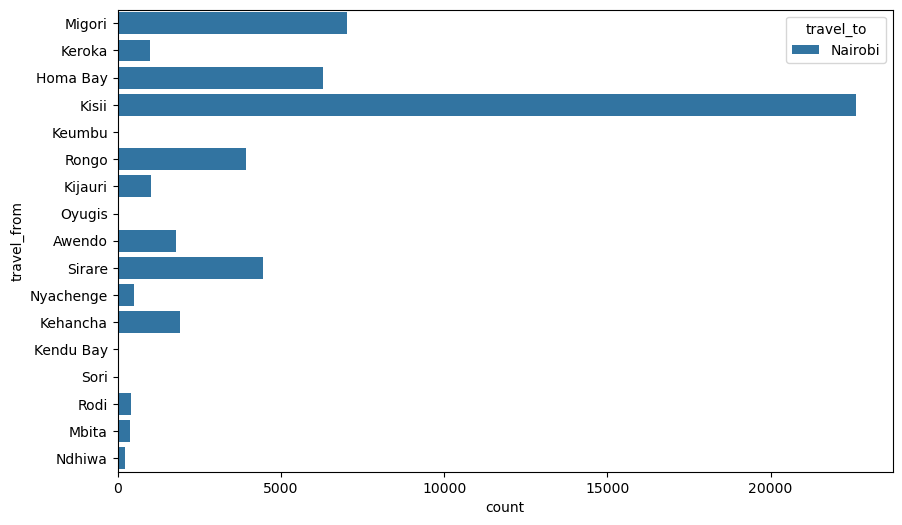

In [40]:
# Plot travel routes
plt.figure(figsize=(10, 6))
sns.countplot(y='travel_from', hue='travel_to', data=df)  # Use a horizontal bar plot
plt.show()

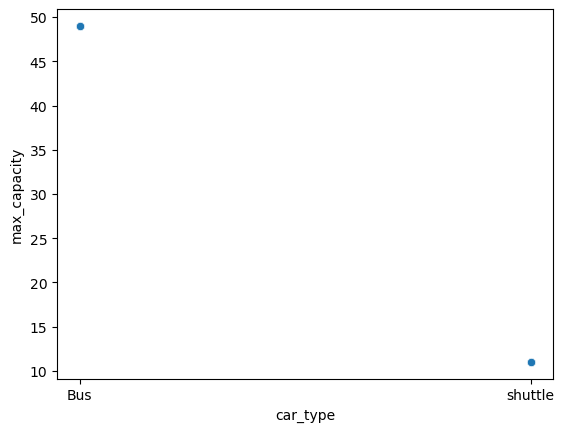

In [12]:
# Scatter plot of car type vs. max capacity
sns.scatterplot(x='car_type', y='max_capacity', data=df)
plt.show()


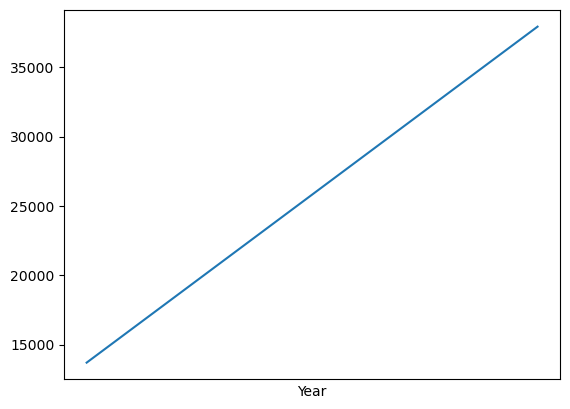

In [39]:
import matplotlib.dates as mdates

# Convert 'travel_date' to datetime and extract the date
df['booking_date'] = pd.to_datetime(df['travel_date']).dt.date

# Extract the year from 'booking_date'
df['booking_year'] = pd.DatetimeIndex(df['booking_date']).year

# Plot year-wise booking trends
df['booking_year'].value_counts().sort_index().plot(kind='line')

# Format the x-axis to show only the years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Set the x-axis label
plt.xlabel('Year')

# Show the plot
plt.show()


In [22]:
# Extract hours and minutes from travel time
df['hour'] = pd.to_datetime(df['travel_time']).dt.hour
df['minute'] = pd.to_datetime(df['travel_time']).dt.minute



In [23]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,booking_date,total_revenue,hour,minute
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,2017-10-17,51645,7,15
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,2017-11-19,51645,7,12
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,2017-11-26,51645,7,5
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,2017-11-27,51645,7,10
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,2017-11-27,51645,7,12


In [27]:
# Calculate average travel time
df['travel_time'] = pd.to_datetime(df['travel_time'])
avg_travel_time = df['travel_time'].mean()
print(f'Average Travel Time: {avg_travel_time}')



Average Travel Time: 2024-03-12 08:52:27.801336064


In [30]:
# Aggregate tickets to know how many passengers are for a given ride_id
from collections import Counter

ride_id_dict = Counter(df["ride_id"])


In [31]:
df_processed = df.drop(['seat_number', 'payment_method', 'payment_receipt', 'travel_to', 'booking_date', 'total_revenue', 'hour', 'minute'], axis=1)

In [32]:
# Remove duplicate rows
df_processed.drop_duplicates(inplace=True)

# Reset the DataFrame index
df_processed.reset_index(drop=True, inplace=True)


In [33]:
# Add a new column "number_of_tickets" and initialize with zeros
df_processed["number_of_tickets"] = np.zeros(len(df_processed))


In [34]:
# For each row in df_processed
for i in range(len(df_processed)):
    # Get the ride_id for the current row
    ride_id = df_processed.loc[i]["ride_id"]
    
    # Set the number_of_tickets for the current row to the corresponding value from ride_id_dict
    df_processed.at[i,"number_of_tickets"] = ride_id_dict[ride_id]


In [35]:
df_processed.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets
0,1442,17-10-17,2024-03-12 07:15:00,Migori,Bus,49,1.0
1,5437,19-11-17,2024-03-12 07:12:00,Migori,Bus,49,1.0
2,5710,26-11-17,2024-03-12 07:05:00,Keroka,Bus,49,1.0
3,5777,27-11-17,2024-03-12 07:10:00,Homa Bay,Bus,49,5.0
4,5778,27-11-17,2024-03-12 07:12:00,Migori,Bus,49,31.0
